# Lending Club Project Using Keras API

## The Data

We will be using a subset of the LendingClub DataSet.

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('lending_club_loan_two.csv')

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [7]:
df.describe(include='object').transpose()

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


# Exploratory Data Analysis

Get an understanding for which variables are important, view summary statistics, and visualize the data

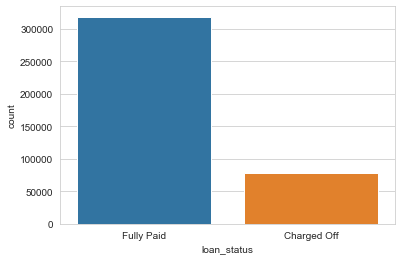

In [8]:
sns.countplot(df['loan_status'])

We have a very imbalanenced dataset here.

Create a histogram of the loan_amnt column.

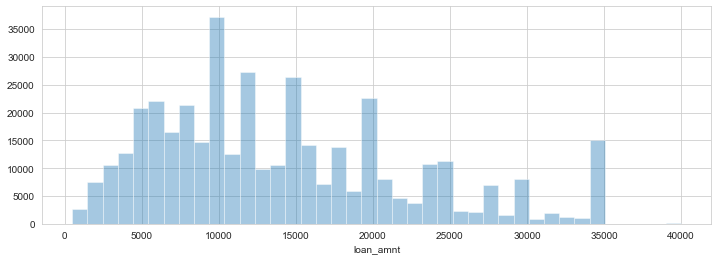

In [9]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'], kde=False, bins=40)

Calculate the correlation between all continuous numeric variables.

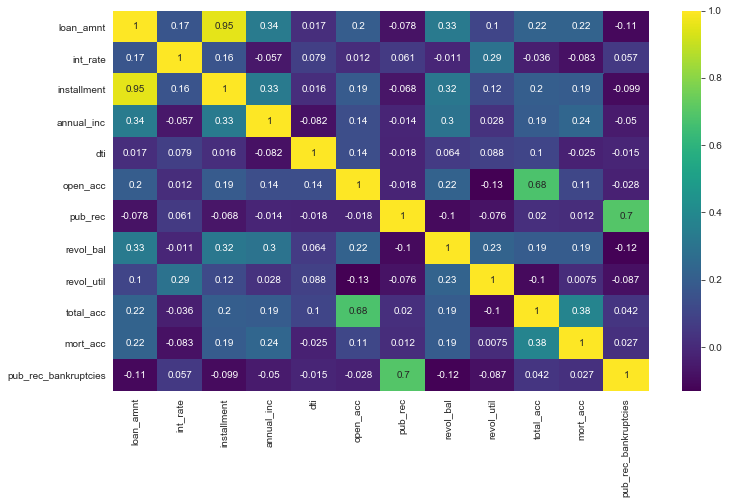

In [10]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

There is an almost perfect correlation with the "installment" feature. We will explore this feature further. We are trying to see we are not accidentally leaking data from our features into our label.

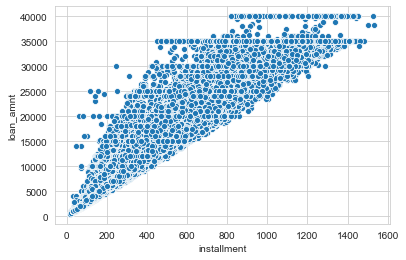

In [11]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)

There is a high correlation between installment and the oan amount.

Create a boxplot showing the relationship between the loan_status and the Loan Amount.

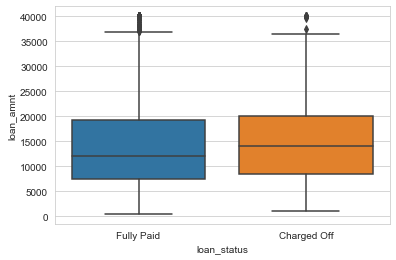

In [12]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

This shows if the loan amount is higher there is a slightly higher chance that it will be charged off 

Calculate the summary statistics for the loan amount, grouped by the loan_status.

In [13]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans.

In [14]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [15]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

Create a countplot per grade. 

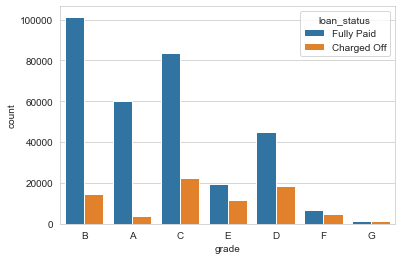

In [16]:
sns.countplot(x='grade', data=df, hue='loan_status')

 Display a count plot per subgrade.

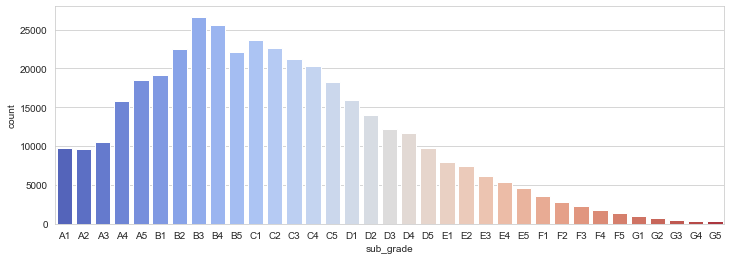

In [17]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=subgrade_order, palette='coolwarm')

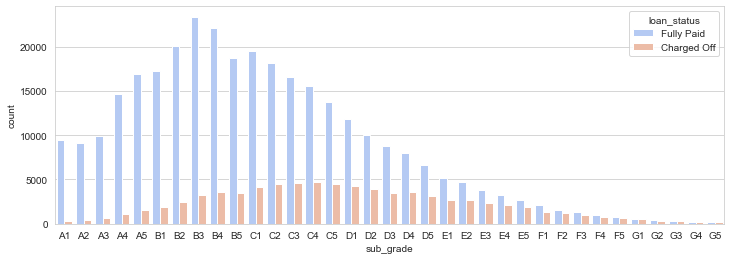

In [18]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=subgrade_order, palette='coolwarm')

It looks like F and G subgrades don't get paid back that often. We will isloate those and recreate the countplot just for those subgrades.

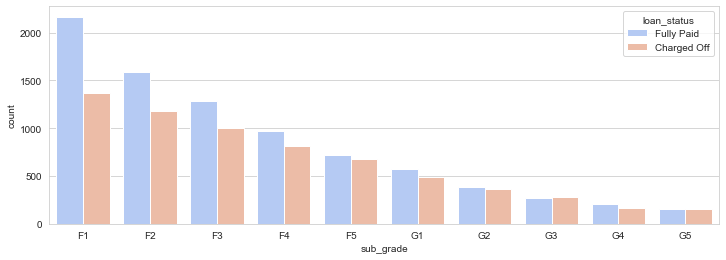

In [19]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade', data=f_and_g, hue='loan_status', order=subgrade_order, palette='coolwarm')

As we move in to G grades the liklihood is the same for fully paid the loan vs charged off the loan.

Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [20]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off':0})

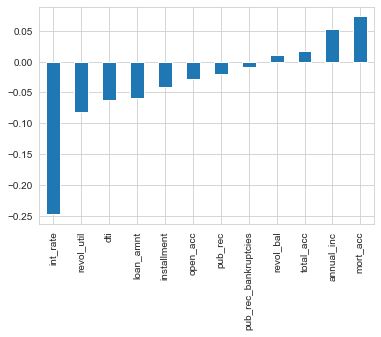

In [21]:
df.corr()['loan_repaid'].sort_values()[:-1].plot(kind='bar')

---
# Data PreProcessing

We will remove or fill any missing data, remove unnecessary or repetitive features, and convert categorical string features to dummy variables.

## Dealing with Missing Data

In [22]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Convert this Series to be in term of percentage of the total DataFrame

In [23]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

Let's examine emp_title and emp_length to see whether it will be okay to drop them.

In [24]:
df['emp_title'].nunique()

173105

In [25]:
df['emp_title'].value_counts()

Teacher                           4389
Manager                           4250
Registered Nurse                  1856
RN                                1846
Supervisor                        1830
                                  ... 
LINE TECHNICIAN                      1
Air Traffic Control Mngr.            1
IT/ Front Office Manager             1
Norwayne Local Schools               1
Chief, Plans and Policy Branch       1
Name: emp_title, Length: 173105, dtype: int64

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [26]:
df.drop('emp_title', axis=1, inplace=True)

Create a count plot of the emp_length feature column.

In [27]:
sorted_emp_length = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
 ]

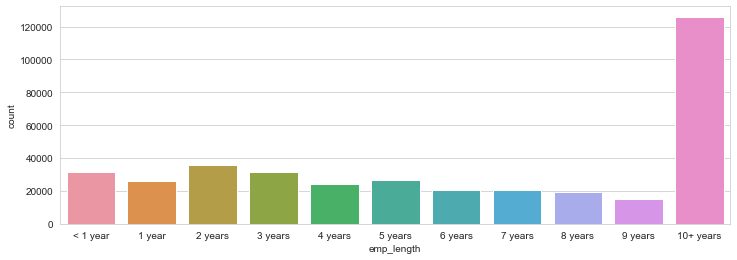

In [28]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df, order=sorted_emp_length)

It shows more people work more than 10 years.

Plot out the countplot with a hue separating Fully Paid vs Charged Off

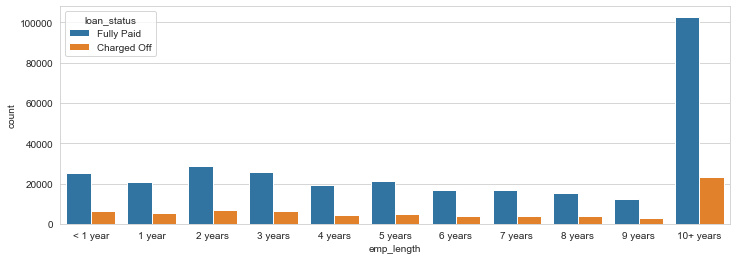

In [29]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df, hue='loan_status' ,order=sorted_emp_length)

This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.

In [30]:
emp_length_co = df[df['loan_status']=='Charged Off'].groupby('emp_length')['loan_status'].count()

In [31]:
emp_length_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length')['loan_status'].count()

In [32]:
emp_length_co/emp_length_fp

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

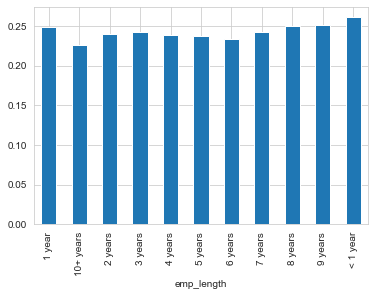

In [33]:
(emp_length_co/emp_length_fp).plot(kind='bar')

Charge off rates are extremely similar across all employment lengths. We will drop the emp_length column.

In [34]:
df.drop('emp_length', axis=1, inplace=True)

Revisit the DataFrame to see what feature columns still have missing data.

In [35]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Review the title column vs the purpose column.

In [36]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [37]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

Seems like it is repeated information. The title column is simply a string subcategory/description of the purpose column. Let's drop the title column.

In [38]:
df.drop('title', axis=1, inplace=True)

The mort_acc feature represents the number of mortgage accounts.

In [39]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

 Let's review the other columsn to see which most highly correlates to mort_acc

In [40]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

Looks like the total_acc feature correlates with the mort_acc. Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry.

In [41]:
mort_acc_mean = df.groupby('total_acc')['mort_acc'].mean()

In [42]:
mort_acc_mean

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above.

In [43]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return mort_acc_mean[total_acc]
    else:
        return mort_acc    

In [44]:
df['mort_acc'] = df.apply(lambda x:fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1 )

In [45]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. We will remove the rows that are missing those values in those columns with dropna().

In [46]:
df.dropna(inplace=True)

In [47]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Dealing with Categorical Variables

In [48]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [49]:
df.select_dtypes(include='object').head()

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,36 months,B,B5,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,36 months,B,B3,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,36 months,A,A2,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,60 months,C,C5,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"


In [50]:
df.describe(include='object').transpose()

,count,unique,top,freq
term,395219,2,36 months,301247
grade,395219,7,B,115812
sub_grade,395219,35,B3,26611
home_ownership,395219,6,MORTGAGE,198022
verification_status,395219,3,Verified,139451
issue_d,395219,112,Oct-2014,14838
loan_status,395219,2,Fully Paid,317696
purpose,395219,14,debt_consolidation,234169
earliest_cr_line,395219,684,Oct-2000,3013
initial_list_status,395219,2,f,237346


**term feature**

Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().

In [51]:
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))

In [52]:
df.select_dtypes(include='object').columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

**grade feature**

We already know grade is part of sub_grade, so we just will drop the grade feature.

In [53]:
df.drop('grade', axis=1, inplace=True)

**sub_grade**

We will convert the subgrade into dummy variables. 

In [54]:
sub_grade = pd.get_dummies(df['sub_grade'], drop_first=True)
df = pd.concat([df.drop('sub_grade', axis=1), sub_grade], axis=1)

**verification_status, application_type,initial_list_status,purpose**

We will convert these columns into dummy variables and concatenate them with the original dataframe.

In [55]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)
df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1, inplace=True)
df = pd.concat([df, dummies], axis=1)

In [56]:
df.select_dtypes(include='object').columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

**home_ownership**

In [57]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

We will convert these to dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe.

In [58]:
df['home_ownership'] =df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

home_ownership = pd.get_dummies(df['home_ownership'], drop_first=True)
df = pd.concat([df.drop('home_ownership', axis=1), home_ownership], axis=1)

In [59]:
df.select_dtypes('object').columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

**address**

We will feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.

In [60]:
zip_code = df['address'].apply(lambda addr: addr[-5:])

In [61]:
zip_code.value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: address, dtype: int64

Now we will make this zip_code column into dummy variables using pandas.

In [62]:
zip_code_dummy = pd.get_dummies(zip_code, drop_first=True)

In [63]:
df = pd.concat([df.drop('address', axis=1), zip_code_dummy], axis=1)

**issue_d** 

This would be **data leakage**, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [64]:
df.drop('issue_d', axis=1, inplace=True)

**earliest_cr_line**

This appears to be a historical time stamp feature. We will extract the year from this feature using a .apply function, then convert it to a numeric feature.

In [65]:
df['year'] = df['earliest_cr_line'].apply(lambda x: int(x.split('-')[1]))

In [66]:
df.drop('earliest_cr_line', axis=1, inplace=True)

We will drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.

In [67]:
df.drop('loan_status', axis=1, inplace=True)

## Train Test Split

In [68]:
from sklearn.model_selection import train_test_split
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Normalizing the Data

We will use a MinMaxScaler to normalize the feature data X_train and X_test.

In [69]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# Creating the Model Using Keras

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

We will build a sequential model to be trained on the data. As this is a classification problem **binary_crossentropy** will be used as the loss metric and  **Adam** optimizer. **Early Stoping** and **Dropout** method will be implemented to avoid overfitting.

In [71]:
X_train.shape

(316175, 78)

We will use 78 units as there are 78 features in our dataset.

In [72]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

### Creating the Tensorboard Callback

TensorBoard is a visualization tool provided with TensorFlow.

This callback logs events for TensorBoard, including:
* Metrics summary plots
* Training graph visualization
* Activation histograms
* Sampled profiling

In [73]:
pwd

'C:\\Users\\salizadeh\\OneDrive\\Documents\\Sara\\GitHub\\Repo\\LendingClub-NeuralNetwork'

In [74]:
log_directory = 'logs\\fit'

board = TensorBoard(log_dir=log_directory,histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)

Now create the model.

In [75]:
model = Sequential()
model.add(Dense(units=78, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=39, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=19, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

Fit the model to the training data for 600 epochs and batch_size of 256. Also add in the validation data for later plotting.

In [76]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          batch_size=256,
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[early_stop, board])

Epoch 1/600
   1/1236 [..............................] - ETA: 0s - loss: 0.6637WARNING:tensorflow:From C:\Users\salizadeh\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1236/1236 [==============================] - 6s 4ms/step - loss: 0.2975 - val_loss: 0.2656
Epoch 2/600
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2655 - val_loss: 0.2635
Epoch 3/600
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2628 - val_loss: 0.2623
Epoch 4/600
1236/1236 [==============================] - 4s 4ms/step - loss: 0.2617 - val_loss: 0.2622
Epoch 5/600
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2607 - val_loss: 0.2617
Epoch 6/600
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2605 - val_loss: 0.2618
Epoch 7/600
1236/1236 [======

Save the model.

In [77]:
model.save('LendingClubModel.h5')

# Evaluating Model Performance

Plot out the validation loss versus the training loss.

In [78]:
losses = pd.DataFrame(model.history.history)

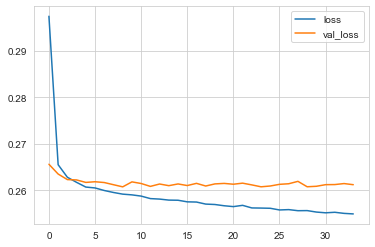

In [79]:
losses[['loss', 'val_loss']].plot()

Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [82]:
print('Confusion Matrix:\n', confusion_matrix(y_pred, y_test))
print('Classification Report:\n', classification_report(y_pred, y_test))

Confusion Matrix:
 [[ 6971   182]
 [ 8687 63204]]
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.97      0.61      7153
           1       1.00      0.88      0.93     71891

    accuracy                           0.89     79044
   macro avg       0.72      0.93      0.77     79044
weighted avg       0.95      0.89      0.91     79044



Because we had an imbalanced dataset (80% of the data was fully paid), 89% accuracy is not a good measure. The f1score is not good here.

In [ ]:
!tensorboard --logdir logs\fit 

Tensorboard will run locally in your browser at http://localhost:6006/